<a href="https://colab.research.google.com/github/rayanearaujoc/DMhealth/blob/main/comportamento_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

df = pd.read_csv('/content/followup_20240611_20240801.csv')

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    else:
        df[column].fillna("valor nulo", inplace=True)

colunas_para_remover = ['id_recrutamento', 'dt_access_5', 'record_id', 'nome']

df = df.drop(columns=colunas_para_remover)

print(df.head())
print(df.info())

df.to_csv('/content/seguimento_tratado.csv', index=False)


   pqar_windows  pqar_quali  pqar_temp  pqar_tempagrado  pqar_umid  \
0             1         1.0          1              1.0          1   
1             1         1.0          4              2.0          3   
2             3         3.0          3              3.0          4   
3             2         3.0          4              3.0          3   
4             2         1.0          4              1.0          3   

   pqar_arcond  pqar_mask  pqar_labcoat  pqar_sint1  pqar_sint2  ...  gad3  \
0          1.0        1.0           1.0         1.0           1  ...   0.0   
1          1.0        2.0           2.0         2.0           3  ...   1.0   
2          2.0        2.0           2.0         3.0           4  ...   3.0   
3          1.0        2.0           2.0         3.0           3  ...   3.0   
4          1.0        2.0           2.0         2.0           2  ...   2.0   

   gad4  gad5 gad6  gad7  escore_gad7  escore_phq9  qsdc_followup  \
0     0   0.0  0.0     0            0    

In [ ]:
import pandas as pd

df = pd.read_csv('/content/recruitment_20240611_20240703.csv')

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    else:
        df[column].fillna("valor nulo", inplace=True)

colunas_para_remover = [
    'hora_igual_q', 'hora_segunda', 'hora_terca', 'hora_quarta', 'hora_quinta', 'hora_sexta', 'hora_sabado', 'hora_domingo', 'allergy_o',
    'group_o','record_id_qsdc', 'record_id', 'dt_access', 'interviewer', 'name', 'e_mail', 'phone_number', 'contact_prefer', 'dob', 'qsdc_seguimento',
    'qsdc_seg_motivo', 'qsdc_seg_outro', 'qsdc_cronicdisease_o', 'qsdc_encerramento', 'qsdc_datafim', 'qsdc_complete', 'tcle_name'
]

df = df.drop(columns=colunas_para_remover)

print(df.head())
print(df.info())

df.to_csv('/content/recrutamento_tratado.csv', index=False)

   tcle_agreement  tcle_complete        age  sex  escol  civilstatus  \
0               1              2  40.000000  1.0  5.000     1.000000   
1               1              2  37.000000  1.0  4.000     2.000000   
2               1              2  33.291139  1.4  3.275     1.708861   
3               1              2  33.291139  1.4  3.275     1.708861   
4               1              2  33.291139  1.4  3.275     1.708861   

    marital  residents    race  group___1  ...  mbiet3  mbiet4  mbiet5  \
0  2.000000     3.0000  4.0000          0  ...   6.000  0.0000  3.0000   
1  1.000000     4.0000  2.0000          0  ...   6.000  6.0000  6.0000   
2  1.417722     2.8375  2.8875          0  ...   1.175  1.1875  0.8625   
3  1.417722     2.8375  2.8875          0  ...   1.175  1.1875  0.8625   
4  1.417722     2.8375  2.8875          0  ...   1.175  1.1875  0.8625   

   mbiet6  escore_gad7  escore_phq9  escore_ee  escore_ci  escore_et  \
0  6.0000      17.0000         14.0   4.170000    

In [ ]:
print(df['escore_gad7'].mean(), " - Ansiedade Média (5-9 leve, 10-14 moderada, 15-21 grave)")
print(df['escore_phq9'].mean(), " - Depressão Média (0-4 ausência, 5-9 leve, 10-14 moderada, 15-19 moderadamente grave, 20-27 grave)")
print(df['escore_burnout'].mean(), " - Burnout Médio (baixo <=1,33; moderado 1,34-2,43; alto >=2,44)")

7.612499999999999  - Ansiedade Média (5-9 leve, 10-14 moderada, 15-21 grave)
7.5  - Depressão Média (0-4 ausência, 5-9 leve, 10-14 moderada, 15-19 moderadamente grave, 20-27 grave)
1.5366249999999997  - Burnout Médio (baixo <=1,33; moderado 1,34-2,43; alto >=2,44)


<ipython-input-89-95a7d1001fb8>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto Ansiedade', y='Doença', data=impacto_df_ansiedade, palette='viridis')


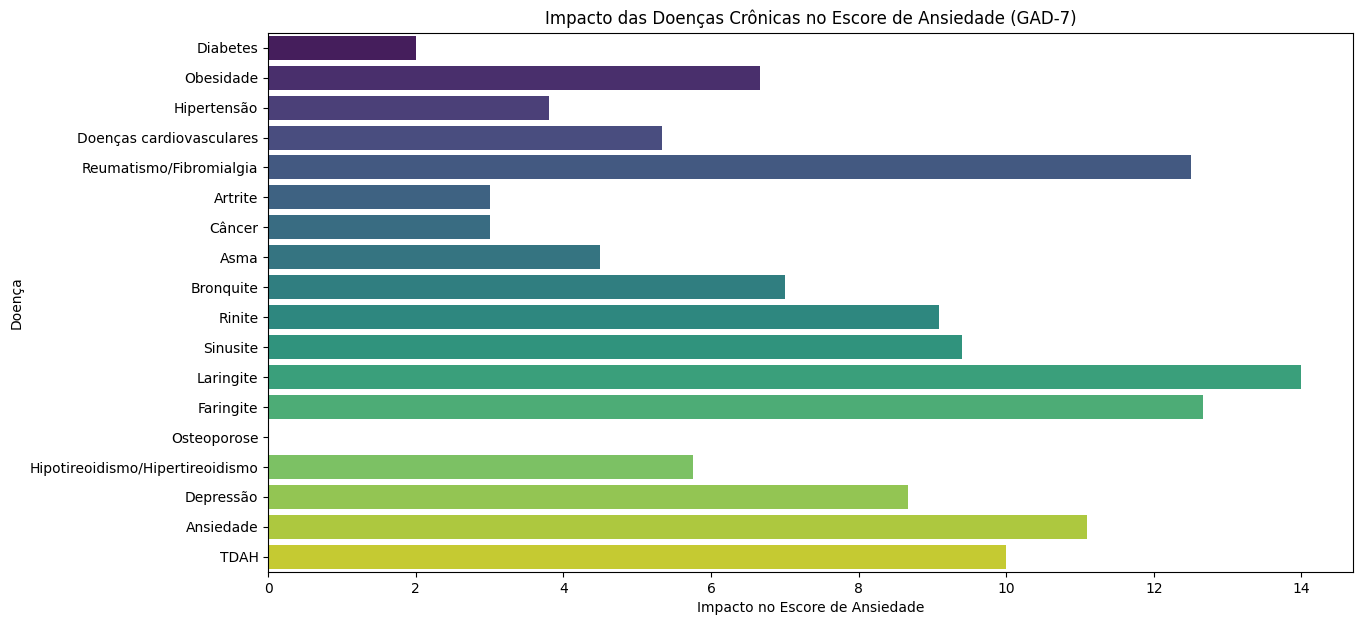

<ipython-input-89-95a7d1001fb8>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto Depressão', y='Doença', data=impacto_df_depressao, palette='viridis')


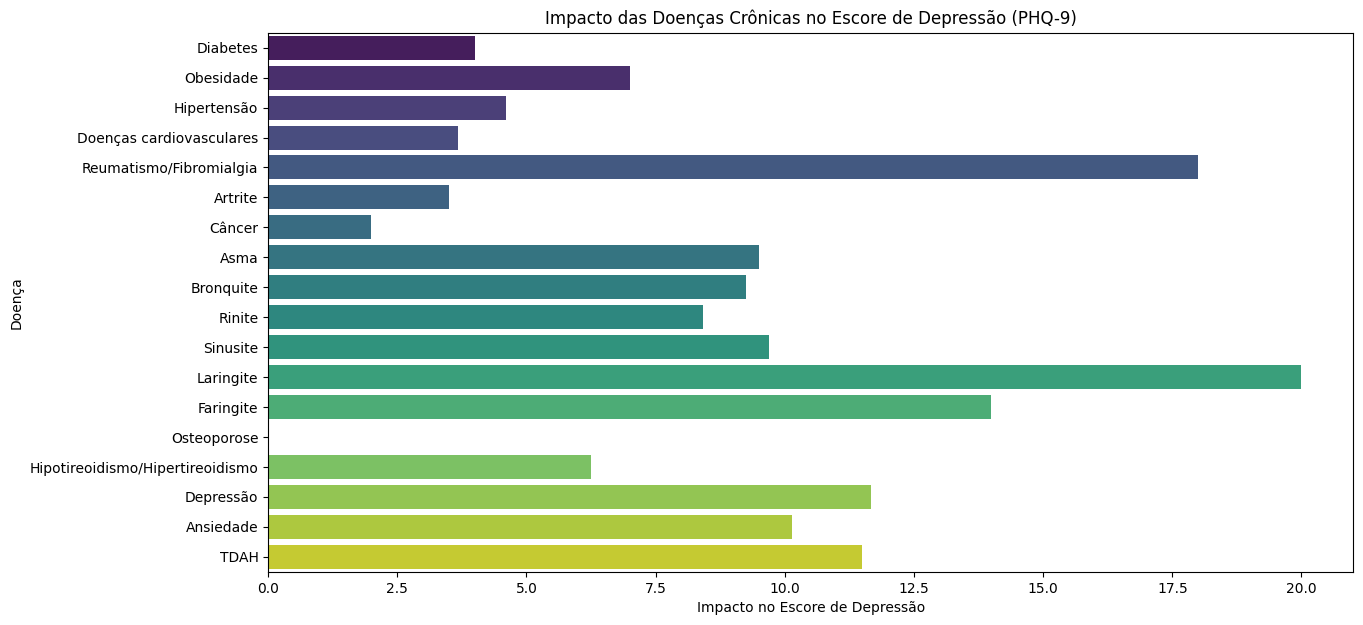

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/recrutamento_tratado.csv')

df.replace('valor nulo', 0, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

def calcular_impacto(df, doencas_cronicas, escore):
    impacto = {}
    for doenca in doencas_cronicas:
        media = df[df[doenca] == 1][escore].mean()
        impacto[doenca] = media
    maior_impacto = max(impacto, key=impacto.get)
    menor_impacto = min(impacto, key=impacto.get)
    return maior_impacto, impacto[maior_impacto], menor_impacto, impacto[menor_impacto]


doencas_cronicas = [
    'cronicdisease___1', 'cronicdisease___2', 'cronicdisease___3', 'cronicdisease___4',
    'cronicdisease___5', 'cronicdisease___6', 'cronicdisease___7', 'cronicdisease___8',
    'cronicdisease___9', 'cronicdisease___10', 'cronicdisease___11', 'cronicdisease___12',
    'cronicdisease___13', 'cronicdisease___14', 'cronicdisease___15', 'cronicdisease___16',
    'cronicdisease___17', 'cronicdisease___18'
]


nomes_doencas = [
    'Diabetes', 'Obesidade', 'Hipertensão', 'Doenças cardiovasculares', 'Reumatismo/Fibromialgia',
    'Artrite', 'Câncer', 'Asma', 'Bronquite', 'Rinite', 'Sinusite', 'Laringite', 'Faringite',
    'Osteoporose', 'Hipotireoidismo/Hipertireoidismo', 'Depressão', 'Ansiedade',
    'TDAH', 'Outra doença/agravo'
]

def calcular_impacto(df, doencas_cronicas, escore):
    impacto = {}
    for doenca in doencas_cronicas:
        media = df[df[doenca] == 1][escore].mean()
        impacto[doenca] = media
    return impacto


impacto_ansiedade = calcular_impacto(df, doencas_cronicas, 'escore_gad7')
impacto_depressao = calcular_impacto(df, doencas_cronicas, 'escore_phq9')


impacto_df_ansiedade = pd.DataFrame(list(impacto_ansiedade.items()), columns=['Doença', 'Impacto Ansiedade'])
impacto_df_depressao = pd.DataFrame(list(impacto_depressao.items()), columns=['Doença', 'Impacto Depressão'])


impacto_df_ansiedade['Doença'] = impacto_df_ansiedade['Doença'].map(dict(zip(doencas_cronicas, nomes_doencas)))
impacto_df_depressao['Doença'] = impacto_df_depressao['Doença'].map(dict(zip(doencas_cronicas, nomes_doencas)))


plt.figure(figsize=(14, 7))
sns.barplot(x='Impacto Ansiedade', y='Doença', data=impacto_df_ansiedade, palette='viridis')
plt.title('Impacto das Doenças Crônicas no Escore de Ansiedade (GAD-7)')
plt.xlabel('Impacto no Escore de Ansiedade')
plt.ylabel('Doença')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Impacto Depressão', y='Doença', data=impacto_df_depressao, palette='viridis')
plt.title('Impacto das Doenças Crônicas no Escore de Depressão (PHQ-9)')
plt.xlabel('Impacto no Escore de Depressão')
plt.ylabel('Doença')
plt.show()


<ipython-input-90-92bc7c996624>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto Ansiedade', y='Condição Ambiental', data=impacto_df_ambiental_ansiedade, palette='viridis')


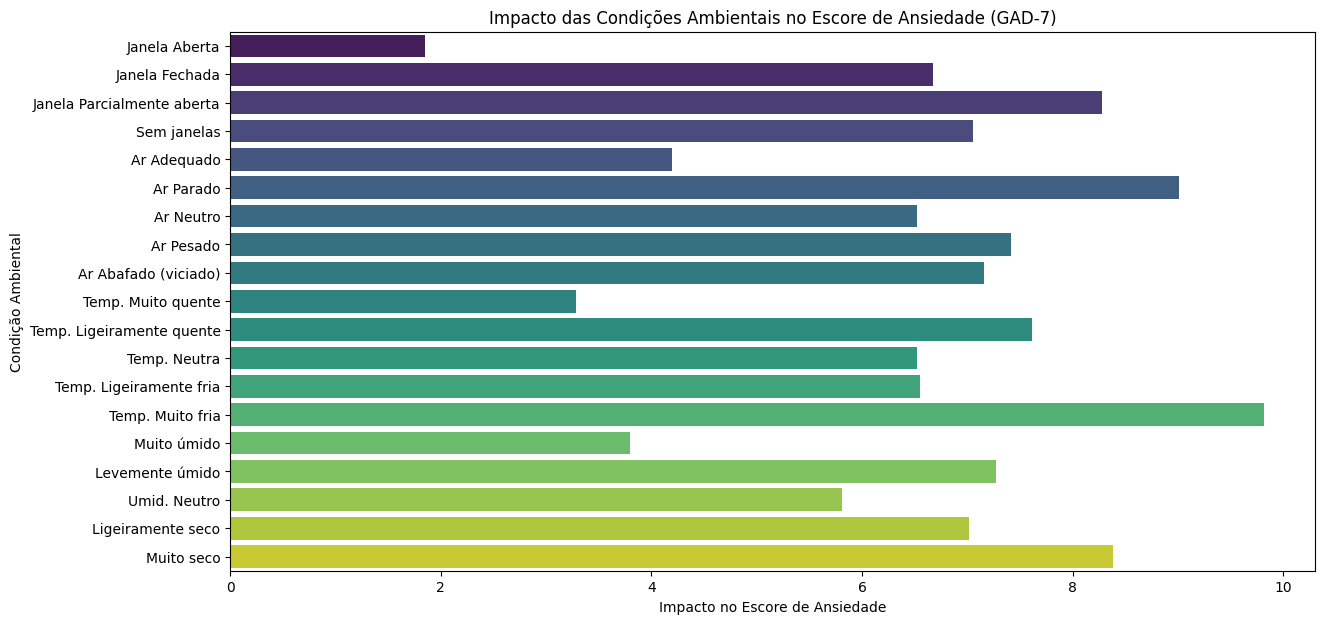

<ipython-input-90-92bc7c996624>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto Depressão', y='Condição Ambiental', data=impacto_df_ambiental_depressao, palette='viridis')


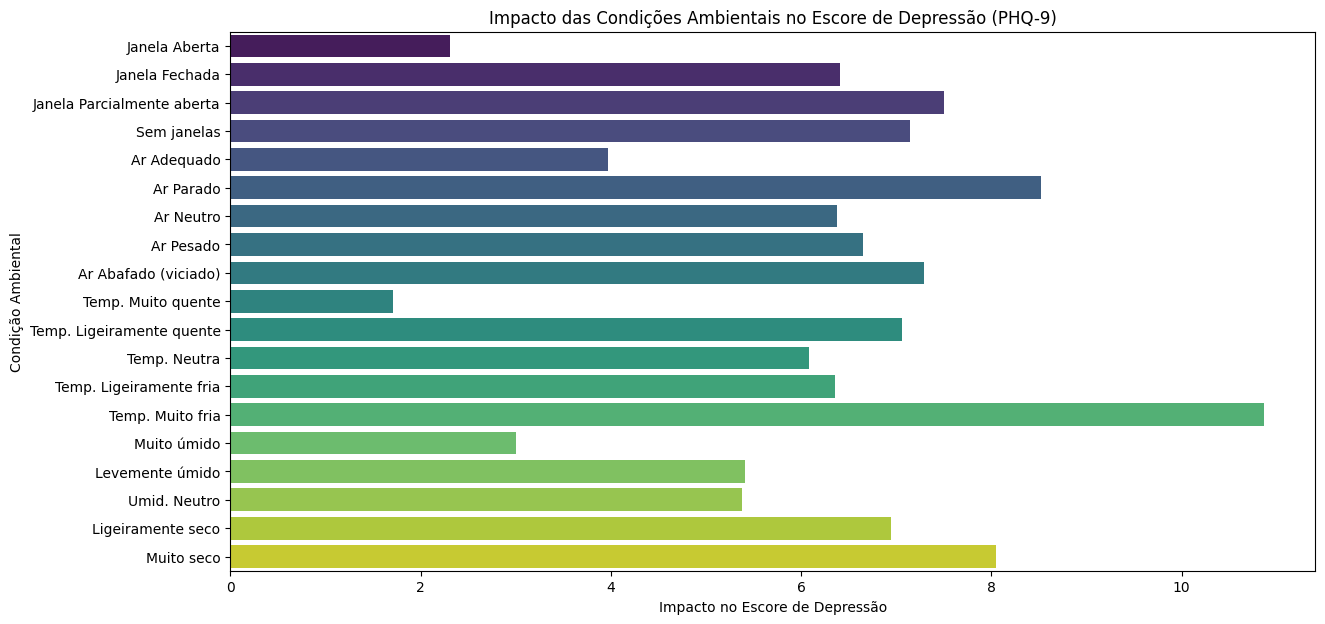

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/seguimento_tratado.csv')


df.replace('valor nulo', 0, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

condicoes_ambientais_nomes = {
    'pqar_windows': {
        1: 'Janela Aberta',
        2: 'Janela Fechada',
        3: 'Janela Parcialmente aberta',
        9: 'Sem janelas'
    },
    'pqar_quali': {
        1: 'Ar Adequado',
        2: 'Ar Parado',
        3: 'Ar Neutro',
        4: 'Ar Pesado',
        5: 'Ar Abafado (viciado)'
    },
    'pqar_temp': {
        1: 'Temp. Muito quente',
        2: 'Temp. Ligeiramente quente',
        3: 'Temp. Neutra',
        4: 'Temp. Ligeiramente fria',
        5: 'Temp. Muito fria'
    },
    'pqar_umid': {
        1: 'Muito úmido',
        2: 'Levemente úmido',
        3: 'Umid. Neutro',
        4: 'Ligeiramente seco',
        5: 'Muito seco'
    }
}

doencas_cronicas_nomes = [
    'Diabetes', 'Obesidade', 'Hipertensão', 'Doenças cardiovasculares', 'Reumatismo/Fibromialgia',
    'Artrite', 'Câncer', 'Asma', 'Bronquite', 'Rinite', 'Sinusite', 'Laringite', 'Faringite',
    'Osteoporose', 'Hipotireoidismo/Hipertireoidismo', 'Depressão', 'Ansiedade',
    'TDAH', 'Outra doença/agravo'
]


def calcular_impacto(df, condicoes_ambientais, escore):
    impacto = {}
    for condicao, mapeamento in condicoes_ambientais.items():
        for valor, descricao in mapeamento.items():
            media = df[df[condicao] == valor][escore].mean()
            impacto[descricao] = media
    return impacto


impacto_ambiental_ansiedade = calcular_impacto(df, condicoes_ambientais_nomes, 'escore_gad7')
impacto_ambiental_depressao = calcular_impacto(df, condicoes_ambientais_nomes, 'escore_phq9')

impacto_df_ambiental_ansiedade = pd.DataFrame(list(impacto_ambiental_ansiedade.items()), columns=['Condição Ambiental', 'Impacto Ansiedade'])
impacto_df_ambiental_depressao = pd.DataFrame(list(impacto_ambiental_depressao.items()), columns=['Condição Ambiental', 'Impacto Depressão'])


plt.figure(figsize=(14, 7))
sns.barplot(x='Impacto Ansiedade', y='Condição Ambiental', data=impacto_df_ambiental_ansiedade, palette='viridis')
plt.title('Impacto das Condições Ambientais no Escore de Ansiedade (GAD-7)')
plt.xlabel('Impacto no Escore de Ansiedade')
plt.ylabel('Condição Ambiental')
plt.show()


plt.figure(figsize=(14, 7))
sns.barplot(x='Impacto Depressão', y='Condição Ambiental', data=impacto_df_ambiental_depressao, palette='viridis')
plt.title('Impacto das Condições Ambientais no Escore de Depressão (PHQ-9)')
plt.xlabel('Impacto no Escore de Depressão')
plt.ylabel('Condição Ambiental')
plt.show()


In [ ]:
def calcular_impacto(df, doencas_cronicas, escore):
    impacto = {}
    for doenca in doencas_cronicas:
        media = df[df[doenca] == 1][escore].mean()
        impacto[doenca] = media
    maior_impacto = max(impacto, key=impacto.get)
    menor_impacto = min(impacto, key=impacto.get)
    return maior_impacto, impacto[maior_impacto], menor_impacto, impacto[menor_impacto]


doencas_cronicas = [
    'cronicdisease___1', 'cronicdisease___2', 'cronicdisease___3', 'cronicdisease___4',
    'cronicdisease___5', 'cronicdisease___6', 'cronicdisease___7', 'cronicdisease___8',
    'cronicdisease___9', 'cronicdisease___10', 'cronicdisease___11', 'cronicdisease___12',
    'cronicdisease___13', 'cronicdisease___14', 'cronicdisease___15', 'cronicdisease___16',
    'cronicdisease___17', 'cronicdisease___18'
]


maior_ansiedade, maior_impacto_ansiedade, menor_ansiedade, menor_impacto_ansiedade = calcular_impacto(df, doencas_cronicas, 'escore_gad7')


maior_depressao, maior_impacto_depressao, menor_depressao, menor_impacto_depressao = calcular_impacto(df, doencas_cronicas, 'escore_phq9')


print(f"A doença crônica com o maior impacto na ansiedade é {maior_ansiedade} com uma média de escore GAD-7 de {maior_impacto_ansiedade:.2f}.")
print(f"A doença crônica com o maior impacto na depressão é {maior_depressao} com uma média de escore PHQ-9 de {maior_impacto_depressao:.2f}.")
print(f"A doença crônica com o menor impacto na ansiedade é {menor_ansiedade} com uma média de escore GAD-7 de {menor_impacto_ansiedade:.2f}.")
print(f"A doença crônica com o menor impacto na depressão é {menor_depressao} com uma média de escore PHQ-9 de {menor_impacto_depressao:.2f}.")

In [ ]:
def calcular_impacto(df, condicoes_ambientais, escore):
    impacto = {}
    for condicao, mapeamento in condicoes_ambientais.items():
        for valor, descricao in mapeamento.items():
            media = df[df[condicao] == valor][escore].mean()
            impacto[descricao] = media
    maior_impacto = max(impacto, key=impacto.get)
    menor_impacto = min(impacto, key=impacto.get)
    return maior_impacto, impacto[maior_impacto], menor_impacto, impacto[menor_impacto]


condicoes_ambientais_nomes = {
    'pqar_windows': {
        1: 'Aberta',
        2: 'Fechada',
        3: 'Parcialmente aberta',
        9: 'Sem janelas'
    },
    'pqar_quali': {
        1: 'Adequado',
        2: 'Parado',
        3: 'Neutro',
        4: 'Pesado',
        5: 'Abafado (viciado)'
    },
    'pqar_temp': {
        1: 'Muito quente',
        2: 'Ligeiramente quente',
        3: 'Neutra',
        4: 'Ligeiramente fria',
        5: 'Muito fria'
    },
    'pqar_umid': {
        1: 'Muito úmido',
        2: 'Levemente úmido',
        3: 'Neutro',
        4: 'Ligeiramente seco',
        5: 'Muito seco'
    }
}

maior_impacto_ansiedade, maior_impacto_valor_ansiedade, menor_impacto_ansiedade, menor_impacto_valor_ansiedade = calcular_impacto(df, condicoes_ambientais_nomes, 'escore_gad7')

maior_impacto_depressao, maior_impacto_valor_depressao, menor_impacto_depressao, menor_impacto_valor_depressao = calcular_impacto(df, condicoes_ambientais_nomes, 'escore_phq9')


print(f"A condição ambiental com o maior impacto na ansiedade é {maior_impacto_ansiedade} com uma média de escore GAD-7 de {maior_impacto_valor_ansiedade:.2f}.")
print(f"A condição ambiental com o maior impacto na depressão é {maior_impacto_depressao} com uma média de escore PHQ-9 de {maior_impacto_valor_depressao:.2f}.")
print(f"A condição ambiental com o menor impacto na ansiedade é {menor_impacto_ansiedade} com uma média de escore GAD-7 de {menor_impacto_valor_ansiedade:.2f}.")
print(f"A condição ambiental com o menor impacto na depressão é {menor_impacto_depressao} com uma média de escore PHQ-9 de {menor_impacto_valor_depressao:.2f}.")
